#1.data setting

##1.1 data setting

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dftrain=pd.read_csv('/content/drive/MyDrive/drug train.csv')
dftest=pd.read_csv('/content/drive/MyDrive/drug test.csv')

In [154]:
dftrain.columns

Index(['Molecule ChEMBL ID', 'Standard Type', 'Standard Relation',
       'Standard Value', 'Standard Units', 'pChEMBL Value', 'Assay ChEMBL ID',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'IC50_nM', 'pIC50', 'Smiles'],
      dtype='object')

standard unit nM

In [ ]:
dftrain['Target Type'].unique()

array(['SINGLE PROTEIN'], dtype=object)

In [127]:
dftrain.drop(['Standard Type','Standard Relation','Target ChEMBL ID','Target Name','Target Type','Standard Value','Target Organism','Standard Units'],axis=1,inplace=True)

In [132]:
dftrain.drop(['IC50_nM','pChEMBL Value'],axis=1,inplace=True)

In [133]:
dfid=dftrain[['Molecule ChEMBL ID','Assay ChEMBL ID','Document ChEMBL ID']].copy()

In [ ]:
#dftrain.drop(['Molecule ChEMBL ID','Assay ChEMBL ID','Document ChEMBL ID'],axis=1,inplace=True)

##1.2 분자지문

In [ ]:
dftrain

,Molecule ChEMBL ID,Assay ChEMBL ID,Document ChEMBL ID,pIC50,Smiles
0,CHEMBL4443947,CHEMBL4361896,CHEMBL4359855,10.66,CN[C@@H](C)C(=O)N[C@H](C(=O)N1C[C@@H](NC(=O)CC...
1,CHEMBL4556091,CHEMBL4345131,CHEMBL4342485,10.59,CC(C)(O)[C@H](F)CN1Cc2cc(NC(=O)c3cnn4cccnc34)c...
2,CHEMBL4566431,CHEMBL4345131,CHEMBL4342485,10.11,CC(C)(O)[C@H](F)CN1Cc2cc(NC(=O)c3cnn4cccnc34)c...
3,CHEMBL4545898,CHEMBL4345131,CHEMBL4342485,10.09,CC(C)(O)[C@H](F)CN1Cc2cc(NC(=O)c3cnn4cccnc34)c...
4,CHEMBL4448950,CHEMBL4361896,CHEMBL4359855,10.00,COc1cc2c(OC[C@@H]3CCC(=O)N3)ncc(C#CCCCCCCCCCCC...
...,...,...,...,...,...
1947,CHEMBL380009,CHEMBL870864,CHEMBL1147720,4.52,O=C(Nc1nc2cc[nH]cc-2n1)c1cccc([N+](=O)[O-])c1
1948,CHEMBL377654,CHEMBL870864,CHEMBL1147720,4.52,CCCCn1c(NC(=O)c2cccc(Cl)c2)nc2ccccc21
1949,CHEMBL208667,CHEMBL870864,CHEMBL1147720,4.52,O=C(Nc1nc2cc(F)c(F)cc2[nH]1)c1cccc([N+](=O)[O-...
1950,CHEMBL3403453,CHEMBL3407004,CHEMBL3400143,4.38,OC[C@H]1C[C@@H](Nc2nc(Nc3ccccc3)ncc2-c2nc3cccc...


In [ ]:
!pip install jpype1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 7.6 MB/s eta 0:00:00


In [ ]:
import jpype
import jpype.imports
from jpype.types import *
from glob import glob
path= glob('/content/drive/MyDrive/Colab Notebooks/DACON/repository/**/*.jar',recursive=True)

jpype.startJVM(classpath=path)

from org.openscience.cdk.smiles import SmilesParser
from org.openscience.cdk.fingerprint import Fingerprinter, ExtendedFingerprinter
from org.openscience.cdk.silent import SilentChemObjectBuilder
from org.openscience.cdk import DefaultChemObjectBuilder


builder = DefaultChemObjectBuilder.getInstance()

smiles = dftrain

parser = SmilesParser(builder)

cdklist=[]
cdkExlist=[]
for i in range(len(smiles)):
  molecule = parser.parseSmiles(smiles.loc[i,'Smiles'])
  fingerprinter=Fingerprinter()
  cdkori=fingerprinter.getFingerprint(molecule)

  extendprinter=ExtendedFingerprinter()
  cdkExori=extendprinter.getFingerprint(molecule)

  bitset_size = cdkori.length()
  cdk = [cdkori.get(i) for i in range(bitset_size)]
  cdk = [1 if bit else 0 for bit in cdk]
  cdklist.append(cdk)

  bitset_size2 = cdkExori.length()
  cdkEx = [cdkExori.get(i) for i in range(bitset_size2)]
  cdkEx = [1 if bit else 0 for bit in cdkEx]
  cdkExlist.append(cdkEx)

jpype.shutdownJVM()

In [ ]:
#cdk = cdkori.asBitSet().toString()
#cdkEx = cdkExori.asBitSet().toString()

In [ ]:
len(cdkExlist)

1952

In [ ]:
dir()

In [ ]:
import os

# Java 설치 경로 확인
!readlink -f $(which java)

# JAVA_HOME 환경 변수 설정
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-11-openjdk-amd64'

# PATH 환경 변수에 JAVA_HOME 추가
os.environ['PATH'] = os.environ['JAVA_HOME'] + '/bin:' + os.environ['PATH']

/usr/lib/jvm/java-11-openjdk-amd64/bin/java


In [ ]:
!pip install padelpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 23.5 MB/s eta 0:00:00


In [ ]:
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 54.5 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import MACCSkeys

# SMILES 문자열로부터 분자 생성
smiles = dftrain.loc[:,'Smiles']

macsslist=[]
for i in range(len(smiles)):
  molecule = Chem.MolFromSmiles(smiles[i])
  maccs_fingerprint = MACCSkeys.GenMACCSKeys(molecule) # MACCS Keys Fingerprint 계산 (substructure fingerprint)
  macsslist.append(list(maccs_fingerprint))


# 결과 출력 (비트 벡터를 리스트로 변환하여 출력)
print("Substructure Fingerprint (MACCS Keys):")
print(list(maccs_fingerprint))

Substructure Fingerprint (MACCS Keys):
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

# SMILES 문자열로부터 분자 생성
smiles = dftrain.loc[:,'Smiles']

morganlist=[]
for i in range(len(smiles)):
  molecule = Chem.MolFromSmiles(smiles[i])
  morgan_count_fingerprint = AllChem.GetHashedMorganFingerprint(molecule, radius=2, nBits=1024)#, useCounts=True / # Hashed Morgan Fingerprint with Counts 계산 (substructure count fingerprint)
  morgan_count_dict = morgan_count_fingerprint.GetNonzeroElements() # 결과 출력 (계산된 해시 값과 빈도를 딕셔너리로 변환하여 출력) # 희소행렬
  morganlist.append(morgan_count_dict)

#print("Substructure Count Fingerprint (Hashed Morgan):")
#print(morgan_count_dict)

# 값이 있으면 하나씩 추가

In [ ]:
# 각 smile에 대해 쭉 이어서 붙여야함.
cdklist
cdkExlist
macsslist
morganlist
# feature 1400개 ? 데이터 1900
# 데이터 개수 줄여서 하이퍼파라미터 범위만 대강 잡아야겠다

In [23]:
len(cdklist[0]) # 1022

1022

In [28]:
len(cdkExlist[800]) # 1015

1015

In [34]:
len(macsslist[20]) # 167

167

In [31]:
len(morganlist[50])

62

In [43]:
morganlist[0].keys

{0: 1,
 1: 2,
 2: 1,
 3: 1,
 4: 4,
 13: 5,
 33: 3,
 39: 1,
 41: 1,
 51: 1,
 64: 2,
 67: 1,
 80: 8,
 86: 1,
 90: 1,
 108: 1,
 110: 1,
 112: 1,
 117: 1,
 128: 4,
 129: 1,
 140: 1,
 143: 1,
 147: 1,
 151: 1,
 175: 2,
 201: 1,
 212: 1,
 218: 1,
 230: 1,
 231: 1,
 242: 1,
 249: 1,
 268: 1,
 283: 1,
 285: 1,
 298: 1,
 300: 2,
 301: 5,
 309: 1,
 314: 1,
 333: 2,
 336: 1,
 356: 9,
 371: 1,
 378: 1,
 384: 1,
 387: 2,
 400: 1,
 401: 1,
 406: 1,
 421: 1,
 428: 2,
 430: 1,
 473: 1,
 478: 1,
 511: 1,
 512: 1,
 521: 1,
 531: 1,
 540: 1,
 551: 1,
 556: 1,
 560: 1,
 562: 1,
 573: 1,
 574: 1,
 599: 2,
 610: 3,
 615: 1,
 624: 1,
 625: 4,
 628: 1,
 650: 6,
 671: 1,
 674: 2,
 684: 1,
 685: 1,
 689: 1,
 691: 2,
 695: 5,
 709: 1,
 714: 2,
 726: 2,
 739: 1,
 777: 1,
 783: 1,
 804: 1,
 807: 5,
 819: 1,
 838: 1,
 841: 2,
 849: 7,
 875: 2,
 883: 1,
 890: 2,
 893: 5,
 896: 1,
 926: 12,
 927: 1,
 935: 1,
 944: 1,
 946: 1,
 949: 1,
 954: 2,
 967: 2,
 968: 3,
 976: 1,
 989: 1,
 1002: 1,
 1019: 5,
 1020: 2}

In [40]:
before=0
for i in range(len(morganlist)):
  a=max(morganlist[0].keys())
  if a > before :
    before=a

print(before)

1020


In [46]:
morganlist2=[]
for i in range(len(morganlist)):
  term=[morganlist[0].get(i,0) for i in range(1021)]
  morganlist2.append(term)

In [47]:
len(morganlist2)

1952

In [61]:
cdkExdb=pd.DataFrame(data=cdkExlist)

In [67]:
cdkExdb.fillna(0,inplace=True)

In [79]:
cdkExdb.drop(list(cdkExdb.loc[:,(cdkExdb==0).all(axis=0)].columns),axis=1,inplace=True)

In [115]:
cdkExdb.columns=list(map(lambda x : 'cdkEx'+str(x),list(cdkExdb.columns)))

In [82]:
macssdb=pd.DataFrame(data=macsslist)

In [92]:
macssdb.drop(list(macssdb.loc[:,(macssdb==0).all(axis=0)].columns),axis=1,inplace=True)

In [116]:
macssdb.columns=list(map(lambda x : 'macss'+str(x),list(macssdb.columns)))

In [93]:
morgandb=pd.DataFrame(data=morganlist2)

In [101]:
morgandb.drop(list(morgandb.loc[:,(morgandb==0).all(axis=0)].columns),axis=1,inplace=True)

In [117]:
morgandb.columns=list(map(lambda x : 'morgan'+str(x),list(morgandb.columns)))

In [138]:
featuredb=pd.concat([dftrain['pIC50'],cdkExdb,macssdb,morgandb],axis=1)

In [139]:
featuredb.shape  # 1952, 1262

(1952, 1263)

In [121]:
featuredb.to_csv('featuredb.csv',index=True)

#2.model

<Axes: xlabel='pIC50', ylabel='Count'>

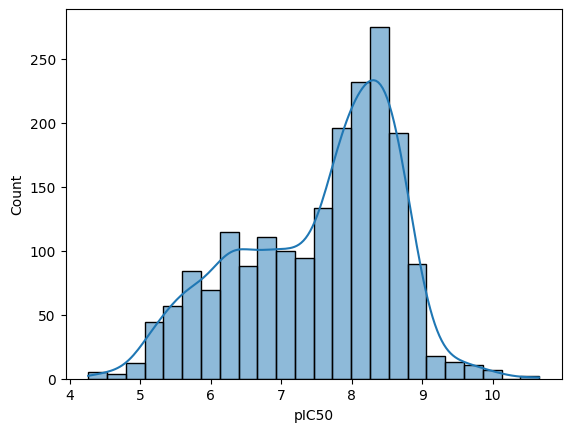

In [140]:
sns.histplot(data=featuredb['pIC50'],kde=True)

In [157]:
#robust scaler
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
featuredb['pIC50']=scaler.fit_transform(featuredb['pIC50'].values.reshape(-1,1))

In [150]:
featuredb2=featuredb.head(600)

In [151]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

model = LGBMRegressor(random_state=42, learning_rate=0.01,n_jobs=-1)
param_grid = {'n_estimators': [10, 50, 100],'max_depth': [3,4, 5, 6],'subsample':[0.6,0.7,0.8,0.9],'colsample_bytree':[0.6,0.7,0.8,0.9]}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10 , refit=True)

grid_search.fit(featuredb2.drop('pIC50',axis=1), featuredb2['pIC50'])

pred=grid_search.best_estimator_.predict(featuredb2.drop('pIC50',axis=1))

print('GrindSearch parameter', grid_search.best_params_)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1782
[LightGBM] [Info] Number of data points in the train set: 540, number of used features: 891
[LightGBM] [Info] Start training from score 8.663556
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

Exception ignored on calling ctypes callback function: <function _log_callback at 0x7c7cf08c6d40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py", line 255, in _log_callback
    def _log_callback(msg: bytes) -> None:
KeyboardInterrupt: 


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [142]:
pred

array([9.90749993, 9.90749993, 9.90749993, 9.90749993, 9.90749993,
       9.90749993, 9.90749993, 9.90749993, 9.90749993, 9.90749993,
       9.90749993, 9.90749993, 9.90749993, 9.90749993, 9.90749993,
       9.90749993, 9.90749993, 9.90749993, 9.90749993, 9.90749993])

In [156]:
def pIC50_to_IC50(pic50_values):
    """Convert pIC50 values to IC50 (nM)."""
    return 10 ** (9 - pic50_values)

In [166]:
resultpred=pd.DataFrame(scaler.inverse_transform(pred.reshape(-1,1)))
resultactual=pd.DataFrame(scaler.inverse_transform(featuredb2['pIC50'].values.reshape(-1,1)))

In [171]:
resultpred.describe()

,0
count,600.000000
mean,22.626862
std,0.254412
min,22.315643
25%,22.455137
50%,22.567789
75%,22.662509
max,23.719705


In [169]:
# scoring
from sklearn.metrics import mean_squared_error
range= max(resultactual)-min(resultactual)
A= np.sqrt(mean_squared_error(resultpred.apply(lambda x: pIC50_to_IC50(x)),resultactual.apply(lambda x: pIC50_to_IC50(x))))/range

featuredb2['pIC50']=scaler.inverse_transform(featuredb2['pIC50'].values.reshape(-1,1))
B=(abs(resultpred - resultactual<=0.5).sum())/len(resultactual)

score=0.5*(1-min(A,1))+0.5*B

print(score)

<ipython-input-169-1c71ccd4de38>:4: RuntimeWarning: divide by zero encountered in scalar divide
  A= np.sqrt(mean_squared_error(resultpred.apply(lambda x: pIC50_to_IC50(x)),resultactual.apply(lambda x: pIC50_to_IC50(x))))/range
<ipython-input-169-1c71ccd4de38>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featuredb2['pIC50']=scaler.inverse_transform(featuredb2['pIC50'].values.reshape(-1,1))


,0
0,0.475


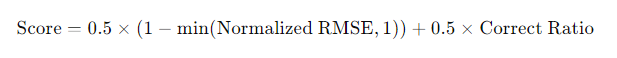